<a href="https://colab.research.google.com/github/mgnarag/Geology-image-classification/blob/main/Model_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello Ate Grass!

This notebook is still a work in progress. Di ko pa naeexplain lahat ng mga lines. Pero, we can run na this.


Sa Google Drive natin na `Geology (Ate Grass)`, may excel file na CNN scores. Bale you will run **models 1,2,3,7,8,9**. Ako naman sa 4,5,6,10,11,12. Isang run lang ang pwede per google colab account. May limit din ang Google Colab  sa pag gamit ng GPU. Usually, I use my other google colab accounts pag ubos na hehe. Pwede mo rin siya irun simultaneously for different accounts. May tatlo akong email so may tatlo akong accounts.

# **1.Installing packages and connecting the google drive**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder

# **2. Preparing the GDrive folder**

First, go to Google Drive first. Nashare ko na noon yung folder na `Geology (Ate Grass)`. Nasa may "shared with me" siya sa google drive. Drag the whole folder sa "My Drive" para magcreate ng shortcut.

Next, going back here sa Google Colab notebook, change the file_path in line 4 of the code below, depending on where the folder `3 classes (polarized)` is stored. An easy way to locate it is clicking the folder icon on the left side of this Colab Notebook. Select `drive`, then `MyDrive`. Hover the mouse on the target directory of the folder. Click the 3 dots, select `copy path`.

Although I think yung nakalagay na file_path dito ay yun na mismo hehe. Palitan lang natin for the unpolarized  `3 classes (unpolarized)`


In [2]:
from google.colab import drive
drive.mount("/content/drive")
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Geology (Ate Grass)/3 classes (polarized)"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 1872_Mindanao_NAP_D.FedericoCaballero.tif
 1885_Mactan_NAP_FelixPelayo.tiff
 201464423-23022858-PaymentSlip.pdf
 313490484_646790150357239_663796780442369775_n.jpg
 361079911_248325231393045_2145216296096417082_n.jpg
'Applied Physics 184 FX-2'
 Architectural_designs
 autoencoder_32
'autoencoder_32 (1)'
 autoencoder_64
'BS Applied Physics'
 Classroom
'CLEAN_[WB] 1872_Mindanao_NAP_D (1).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (2).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (3).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D.FedericoCaballero.tif'
'CNN scores.gsheet'
'Colab Notebooks'
'CONSENT_NARAG_MARK JEREMY_G.pdf'
 CONSENT_NARAG_MARKJEREMY_G.pdf
 CS284
'Dorm bill.png'
 Fast-Dreambooth
'fingerprint (1).pb'
'fingerprint (2).pb'
 fingerprint.pb
 FN.png
 FP.png
 GAN
'Geology (Ate Grass)'
'Getting started.pdf'
 image.jpg
 IMG_503

# **3.Preparing the training and validation dataset**
### make sure to change the `img_size` to the correct image size of the model:
*   For ALEXNET, it is 227 by 227
*   For VGG16, it is 224 by 224
*   For RESNET, it is 224 by 224




In [ ]:
img_size = 224

# Function to resize images to img_size
def resize_image(image_path):
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    return img_array


def rot_and_flip(img):
  x = np.rot90(img, k=-1) #90
  train_images.append(x)
  train_labels.append(class_name)
  #train_images.append(np.fliplr(x))
  #train_labels.append(class_name)
  return x

# Load and preprocess training data
train_images = []
train_labels = []

train_dir = file_path + '/Training/'
class_labels = ["Poor",  "Good", "Very good"]

for class_name in class_labels:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        x = resize_image(image_path)
        train_images.append(x)
        train_labels.append(class_name)
        #rotate and flip if we want to augment. Pero wag muna
        x = rot_and_flip(x) #90
        #x = rot_and_flip(x) #180
        #x = rot_and_flip(x) #270


# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

print('shape of total dataset', np.shape(train_images))
print('shape of total dataset label', np.shape(train_labels))

# Encode class names into numerical labels
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Convert numerical labels to one-hot encoded vectors
train_labels = to_categorical(train_labels_encoded, num_classes=len(class_labels))


#train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, stratify=train_labels, random_state=42)

print('shape of dataset for training', np.shape(train_images))
print('shape of dataset label for training', np.shape(train_labels))
print('shape of dataset for validation', np.shape(val_images))
print('shape of dataset label for validation', np.shape(val_labels))

 Visualize:

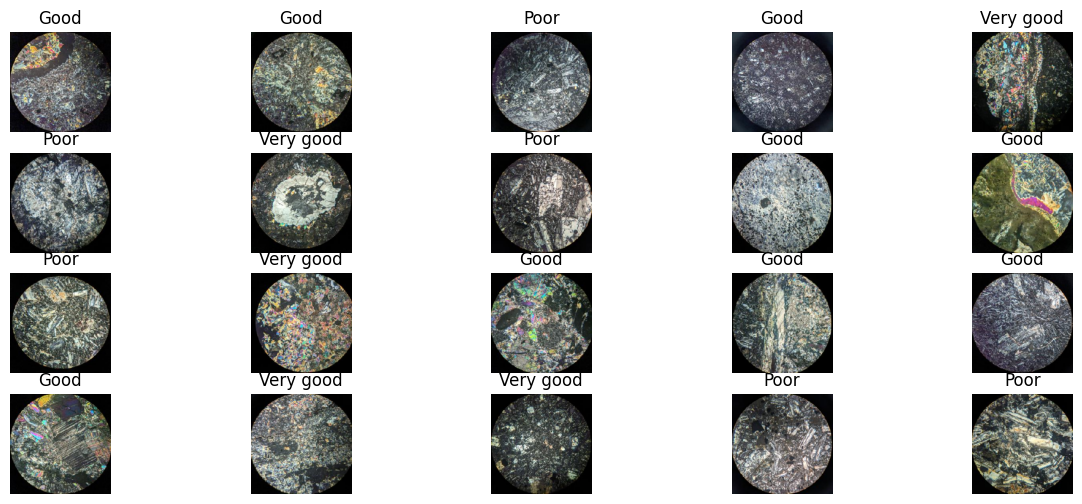

In [4]:
import matplotlib.pyplot as plt

def display_images(images, labels, class_names, num_images=20):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(4, 5, i+1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        plt.title(class_names[label_index])
        plt.axis('off')
    plt.show()

# Decode one-hot encoded labels back to class names
class_names = label_encoder.classes_

# Display the first 20 training images
display_images(train_images[:20], train_labels[:20], class_names)


# **4. Training the model**

We will train three (3) different models. We will run them separately.


### **RUN THIS FOR ALEXNET**
There is no built-in model for alexnet so we have to create it from scratch

In [ ]:
#AlexNet architecture from scratch
alex_model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)

alex_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Train  model
alex_model.fit(train_images, train_labels, epochs=100, batch_size=8, validation_data=(val_images, val_labels))
alex_model.save(file_path + "/Models/alex_model")

Epoch 1/100
480/480 [==============================] - 21s 23ms/step - loss: 1.1005 - accuracy: 0.3271 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
480/480 [==============================] - 10s 21ms/step - loss: 1.0991 - accuracy: 0.3375 - val_loss: 1.0730 - val_accuracy: 0.4875
Epoch 3/100
480/480 [==============================] - 9s 19ms/step - loss: 1.0018 - accuracy: 0.4820 - val_loss: 0.8894 - val_accuracy: 0.5479
Epoch 4/100
480/480 [==============================] - 10s 21ms/step - loss: 0.8327 - accuracy: 0.6076 - val_loss: 0.7405 - val_accuracy: 0.6958
Epoch 5/100
480/480 [==============================] - 10s 21ms/step - loss: 0.6406 - accuracy: 0.7328 - val_loss: 0.6660 - val_accuracy: 0.7385
Epoch 6/100
480/480 [==============================] - 10s 21ms/step - loss: 0.5120 - accuracy: 0.7909 - val_loss: 0.4703 - val_accuracy: 0.8177
Epoch 7/100
480/480 [==============================] - 10s 20ms/step - loss: 0.4295 - accuracy: 0.8279 - val_loss: 0.4010 - val_acc

### **RUN THIS FOR VGG16**
There is already a built-in model for vgg16 so we don't need to create it from scratch

In [ ]:
# Load VGG16 mode:
vgg_base = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#Add "weights='imagenet'" if we want pretrained weights

# Freeze the pre-trained layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classifier layers on top of the pre-trained layers
x = Flatten()(vgg_base.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x) #because we have 3 classes

# Create the full model
vgg_model = Model(inputs=vgg_base.input, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=0.00001)
vgg_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg_model.fit(train_images, train_labels, epochs=100, batch_size=8, validation_data=(val_images, val_labels))
vgg_model.save(file_path + "/Models/vgg_model_tl")

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/100
480/480 [==============================] - 55s 98ms/step - loss: 1.0374 - accuracy: 0.5224 - val_loss: 0.8082 - val_accuracy: 0.6146
Epoch 2/100
480/480 [==============================] - 42s 88ms/step - loss: 0.8081 - accuracy: 0.6359 - val_loss: 0.6287 - val_accuracy: 0.7521
Epoch 3/100
480/480 [==============================] - 48s 100ms/step - loss: 0.6718 - accuracy: 0.7128 - val_loss: 0.5284 - val_accuracy: 0.7948
Epoch 4/100
480/480 [==============================] - 43s 90ms/step - loss: 0.5781 - accuracy: 0.7576 - val_loss: 0.5182 - val_accuracy: 0.7844
Epoch 5/100
480/480 [==============================] - 43s 91ms/step - loss: 0.5314 - accuracy: 0.7786 - val_loss: 0.4792 - val_accuracy: 0.8219
Epoch 6/100
480/480 [==============================] - 43s 90ms/step - loss: 0.4667 - accuracy: 0.8034 - val_loss: 0.5289 - val_accuracy: 0.7667
Epoch 7/100
480/480 [==============================] - 48s 99ms/

### **RUN THIS FOR RESNET**

In [5]:
resnet_base = tf.keras.applications.ResNet50(include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in resnet_base.layers:
    layer.trainable = True

# Add custom classifier layers on top of the pre-trained layers
x = Flatten()(resnet_base.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

# Create the full model
resnet_model = Model(inputs=resnet_base.input, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=0.00001)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
resnet_model.fit(train_images, train_labels, epochs=100, batch_size=8, validation_data=(val_images, val_labels))
resnet_model.save(file_path + "/Models/resnet_model")

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/100
480/480 [==============================] - 87s 91ms/step - loss: 0.8760 - accuracy: 0.6771 - val_loss: 5.3139 - val_accuracy: 0.3333
Epoch 2/100
480/480 [==============================] - 41s 85ms/step - loss: 0.1557 - accuracy: 0.9417 - val_loss: 1.9363 - val_accuracy: 0.5323
Epoch 3/100
480/480 [==============================] - 40s 84ms/step - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.5268 - val_accuracy: 0.8333
Epoch 4/100
480/480 [==============================] - 41s 85ms/step - loss: 0.0413 - accuracy: 0.9857 - val_loss: 0.5660 - val_accuracy: 0.8385
Epoch 5/100
480/480 [==============================] - 40s 83ms/step - loss: 0.0248 - accuracy: 0.9911 - val_loss: 0.5539 - val_accuracy: 0.8281
Epoch 6/100
480/480 [==============================] - 40s 84ms/step - loss: 0.0910 - accuracy: 0.9680 - val_loss: 0.7760 - val_accuracy: 0.8260
Epoch 7/100
480/480 [==============================] - 39s 81ms/s

# **5. TEST THE MODEL**

#### Load testing dataset:

### make sure to change the `img_size` to the correct image size of the model:
*   For ALEXNET, it is 227 by 227
*   For VGG16, it is 224 by 224
*   For RESNET, it is 224 by 224

In [3]:
img_size = 224

# I will free up the RAM
train_images = []
train_labels = []

# Load and preprocess test data
test_images = []
test_labels = []

test_dir = file_path + '/Testing/'
class_labels = ["Poor",  "Good", "Very good"]


# Function to resize images to img_size
def resize_image(image_path):
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    return img_array


for class_name in class_labels:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        test_images.append(resize_image(image_path))
        test_labels.append(class_name)

#print(test_labels)
test_images = np.array(test_images)
# Encode class names into numerical labels

label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert numerical labels to one-hot encoded vectors
test_labels = to_categorical(test_labels_encoded, num_classes=len(class_labels))

print('shape of test data',np.shape(test_labels))

shape of test data (1963, 3)


#### Testing and calculating the evalution metrics
**Don't forget to change lines 2 and 3:**


In [4]:
from keras.models import load_model

model = str("resnet_model") #either alex_model, vgg_model, resnet_model
model_name = str("resnet") #change to alexnet, vgg, resnet

model = load_model(file_path + '/Models/' + model)

# Predict probabilities for test data
y_pred_prob = model.predict(test_images)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
# Convert one-hot encoded test labels to class labels
y_true = np.argmax(test_labels, axis=-1)

62/62 [==============================] - 7s 46ms/step


Overall Precision: 0.834386430495702
Overall Recall: 0.6444218033622007
Overall F1-Score: 0.7162768193887203
Classification Report:
               precision    recall  f1-score   support

        Poor       0.92      0.63      0.74      1496
        Good       0.58      0.70      0.63       461
   Very good       0.01      0.83      0.03         6

    accuracy                           0.64      1963
   macro avg       0.50      0.72      0.47      1963
weighted avg       0.83      0.64      0.72      1963



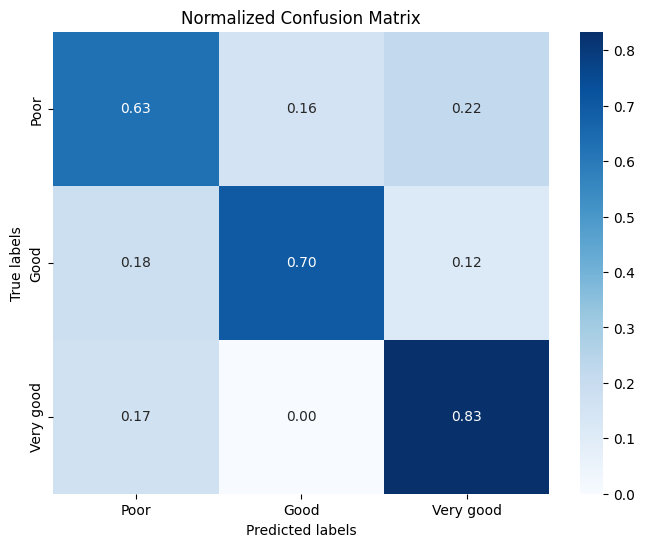

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')

# Save confusion matrix image
plt.savefig(file_path + '/CM_'+model_name+'.png')

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print overall precision, recall, and F1-score
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-Score:", f1_score)


from sklearn.metrics import precision_recall_fscore_support, classification_report

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

# Specify the file path
file_path_1 = file_path+ "/Metric_"+model_name+".txt"

# Save classification report to a text file along with precision, recall, and F1-score
with open(file_path_1, 'w') as f:
    f.write("Precision: {:.4f}\n".format(precision))
    f.write("Recall: {:.4f}\n".format(recall))
    f.write("F1-score: {:.4f}\n\n".format(f1_score))
    f.write("Classification Report:\n")
    f.write(report)
